#Multi Neural Network
This notebook will demonstrate an implementation of an artificial neural network (multi-layer perceptron) with the cwur university ranking dataset.
Will analyse target variable World rank with respect to other features




In [ ]:
#importing necessary liabraries
import pandas as pd
data=pd.read_csv('cwurData.csv')
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


#Data Cleaning

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [ ]:

data = data.drop(['institution', 'country','national_rank','year', 'score'], axis=1)
data.head()

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents
0,1,7,9,1,1,1,1,NaN,5
1,2,9,17,3,12,4,4,NaN,1
2,3,17,11,5,4,2,2,NaN,15
3,4,10,24,4,16,16,11,NaN,50
4,5,2,29,7,37,22,22,NaN,18


In [ ]:
data.head()

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents
0,1,7,9,1,1,1,1,NaN,5
1,2,9,17,3,12,4,4,NaN,1
2,3,17,11,5,4,2,2,NaN,15
3,4,10,24,4,16,16,11,NaN,50
4,5,2,29,7,37,22,22,NaN,18


In [ ]:
data.drop('broad_impact', axis=1, inplace=True)

In [ ]:
data.head()

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents
0,1,7,9,1,1,1,1,5
1,2,9,17,3,12,4,4,1
2,3,17,11,5,4,2,2,15
3,4,10,24,4,16,16,11,50
4,5,2,29,7,37,22,22,18


In [ ]:
!pip install tensorflow

#Split into Train and Test data
To create a neural network, we will split the dataset into "training" and "test" data.
The next step is to select which features we want to use, standardize them

In [ ]:
X = data.iloc[:, 1:8].values
y = data.iloc[:, 0].values

In [ ]:
y

array([   1,    2,    3, ...,  998,  999, 1000])

In [ ]:
#Importing necessary liabraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


X = data.iloc[:, 1:8].values
y = data.iloc[:, 0].values

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale input and output data using StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# create a neural network with three fully connected layers
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[7]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# compile the model with an optimizer and loss function
model.compile(optimizer='adam', loss='mse')

# train the model on the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# evaluate the model on the testing data
loss = model.evaluate(X_test, y_test)
print("Testing loss:", loss)


Epoch 1/100
44/44 [==============================] - 1s 6ms/step - loss: 0.3061 - val_loss: 0.0831
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0602 - val_loss: 0.0635
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0504 - val_loss: 0.0643
Epoch 4/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0469 - val_loss: 0.0570
Epoch 5/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0435 - val_loss: 0.0585
Epoch 6/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0425 - val_loss: 0.0542
Epoch 7/100
44/44 [==============================] - 0s 11ms/step - loss: 0.0405 - val_loss: 0.0563
Epoch 8/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0405 - val_loss: 0.0525
Epoch 9/100
44/44 [==============================] - 0s 11ms/step - loss: 0.0383 - val_loss: 0.0550
Epoch 10/100
44/44 [==============================] - 0s 11ms/step - loss: 0.0378 - val_loss: 0.0510
Epoc

#Performance Analysis 
Calculating  root mean squared error (RMSE) and R^2 of the model on the testing data 

In [ ]:
# compute RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

14/14 [==============================] - 0s 2ms/step
RMSE: 0.20382648121640995


In [ ]:
from sklearn.metrics import r2_score

# evaluate the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


14/14 [==============================] - 0s 3ms/step
R2 score: 0.9579516426968132


The RMSE and R2 score suggest that the model is  able to make reasonable predictions on the test data.

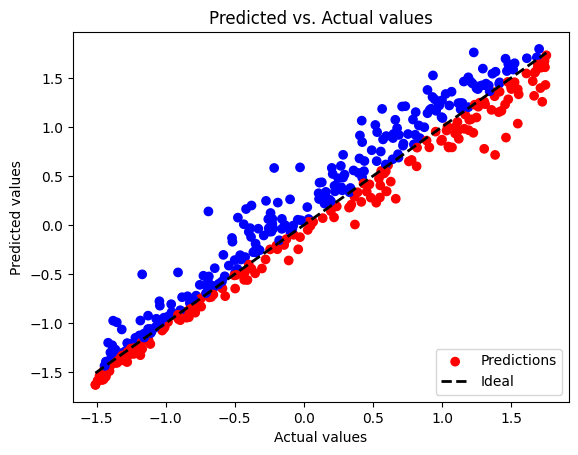

In [ ]:
# create a scatter plot of predicted vs. actual values with different colors
plt.scatter(y_test, y_pred, c=['b' if x < y else 'r' for x, y in zip(y_test, y_pred)], label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs. Actual values")
plt.legend(loc='lower right')
plt.show()


The scatter plot of predicted vs. actual values shows a mostly linear relationship, indicating that the model is capturing some of the underlying patterns in the data.

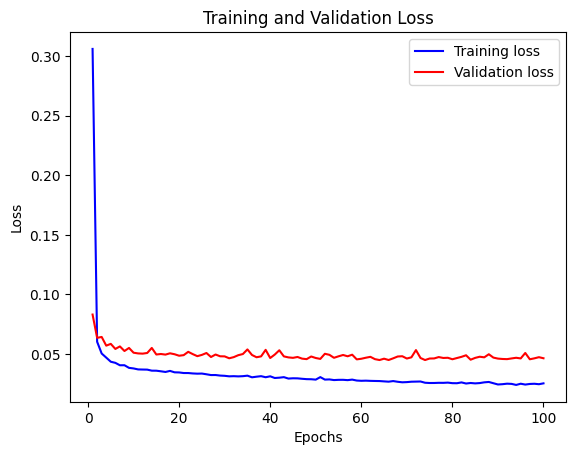

In [ ]:
# model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plotting learning curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



14/14 [==============================] - 0s 6ms/step


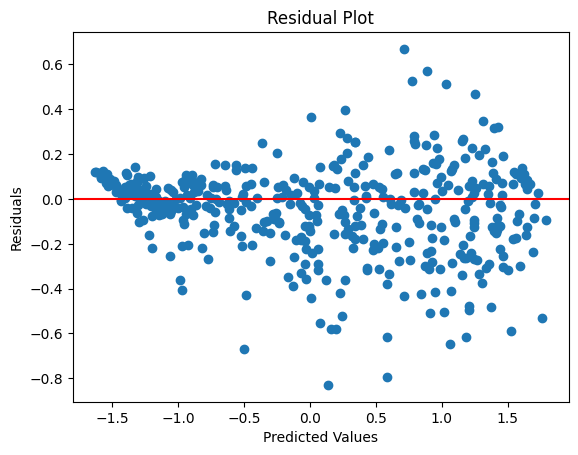

In [ ]:
# Plotting residual plot
y_pred = model.predict(X_test)
residuals = y_test - y_pred.flatten()

plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


Conclusion : Based on the learning curves, it appears that the neural network is overfitting the training data, as the training loss continues to decrease while the validation loss remains relatively stable. This suggests that the model is memorizing the training data instead of generalizing well to new data.



Overall, while the model may not be optimal, it still performs reasonably well on the test data. Further tuning of the model's architecture and hyperparameters may be able to improve its performance.